# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

BUSINESS UNDERSTANDING: The task is to use a dataset containing attributes of used cars and their prices to create a model to predict the price attributed given these  attributes which include descriptions of  the car's structure and features as well as its age, mileage, and condition at time of sale. The aim is to find those attributes whose values strongly influence the price of the car.

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vehicles_raw = pd.read_csv('sample_data/vehicles.csv')
vehicles_raw['age'] = 2023 - vehicles_raw['year']
vehicles_raw['logage'] = np.log10(vehicles_raw['age']+1)
vehicles_raw['logprice'] = np.log10(vehicles_raw['price']+1)

vehicles = vehicles_raw.copy()

vehicles = vehicles.drop('VIN',axis=1)
# new columns


print('Size of raw dataset: ', len(vehicles_raw))
def numeric_column_stats(df, column_name):
    if column_name in df.select_dtypes(include=["number"]).columns:
        stats = df[column_name].describe(percentiles=[0.25, 0.75])
        print(f"Descriptive Stats for '{column_name}':")
        print(f"--------------------------------- '")
        print(f"Mean: {stats['mean']:.2f}")
        print(f"Standard Deviation: {stats['std']:.2f}")
        print(f"Minimum: {stats['min']:.2f}")
        print(f"25th Percentile: {stats['25%']:.2f}")
        print(f"75th Percentile: {stats['75%']:.2f}")
        print(f"Maximum: {stats['max']:.2f}")
    else:
        print(f"Column '{column_name}' is not numeric or does not exist in the DataFrame.")
numeric_column_stats(vehicles, 'price')
numeric_column_stats(vehicles, 'age')
numeric_column_stats(vehicles, 'odometer')

ValueError: cannot convert float NaN to integer

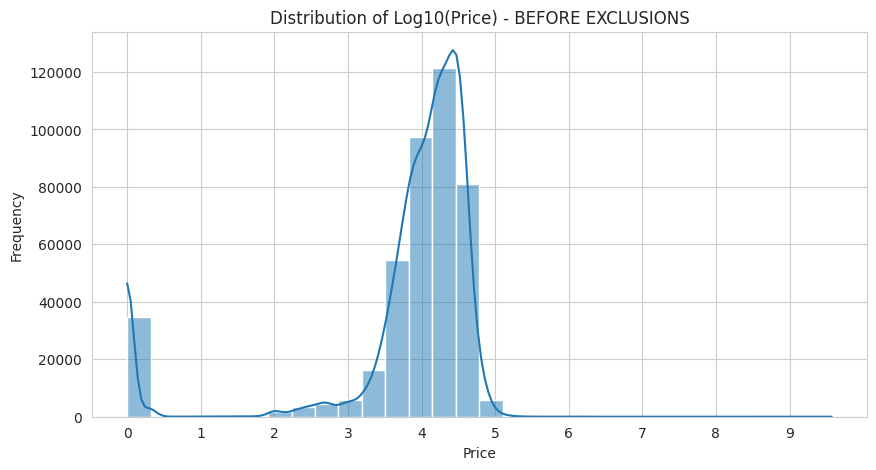

INITIAL  Number of Vehicles:  65811
Post NULLs Number of Vehicles:  65811


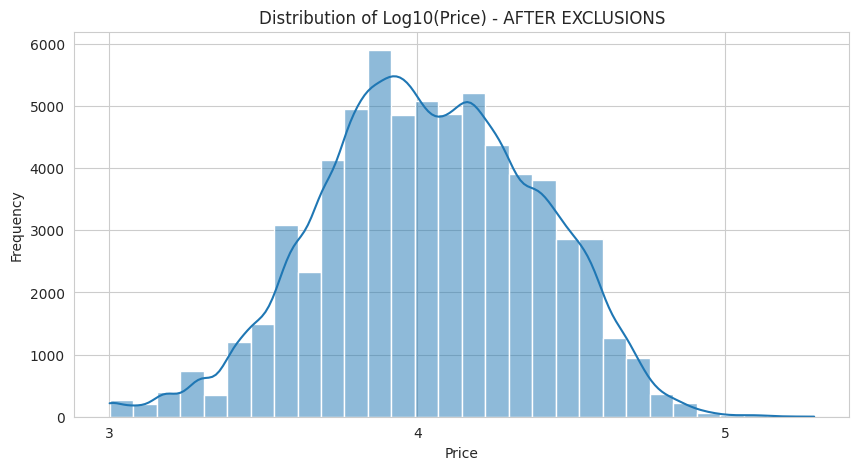

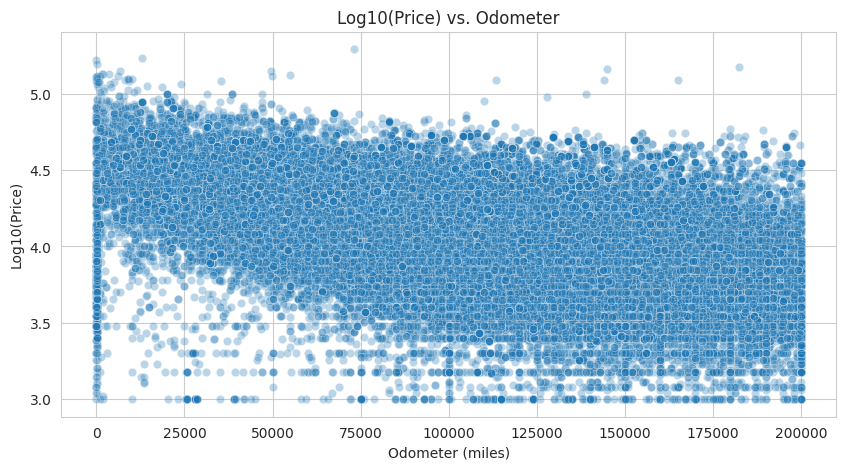

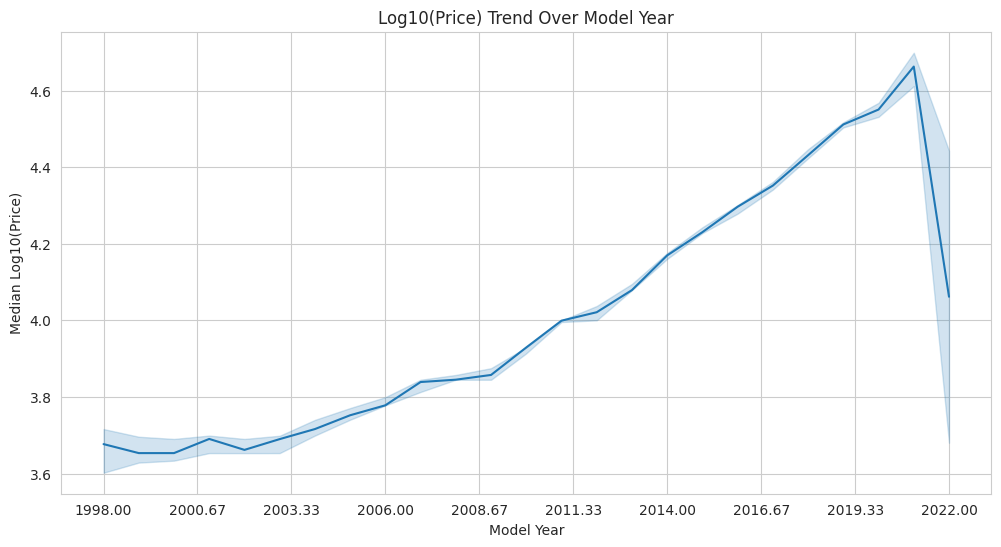

In [ ]:
# Understand the distribution of the Price column (Target Variable)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(vehicles_raw['logprice'], bins=30, kde=True)
min_logprice = int(vehicles_raw['logprice'].min())
max_logprice = int(vehicles_raw['logprice'].max())
plt.xticks(np.arange(min_logprice, max_logprice + 1, 1))
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Log10(Price) - BEFORE EXCLUSIONS")
plt.show()
# Takeaway: Outlier Group 1: about 30k cars are priced below $10
# Outlier Group 2: there are several cars priced above $1 million , all the way to more than $1 billion

# Now Remove outliers and rows with missing values

print('INITIAL  Number of Vehicles: ', len(vehicles))
vehicles.dropna(subset=['year'], inplace = True)
vehicles.dropna(subset=['manufacturer'], inplace = True)
vehicles.dropna(subset=['model'], inplace = True)
vehicles.dropna(subset=['odometer'], inplace = True)
vehicles.dropna(subset=['condition'], inplace = True)
# drive, size, and type
vehicles.dropna(subset=['drive'], inplace = True)
vehicles.dropna(subset=['size'], inplace = True)
vehicles.dropna(subset=['type'], inplace = True)

#vehicles['manufacturer'].dropna().unique().tolist()

print('Post NULLs Number of Vehicles: ', len(vehicles))

vehicles.drop(vehicles[vehicles['age']>25].index, inplace= True) # exclude cars older than 25 years
vehicles.drop(vehicles[vehicles['price']<1000].index,inplace= True) #exclude cars under $1000
vehicles.drop(vehicles[vehicles['price']>4e5].index, inplace= True) #exclude cars over $400,000
vehicles.drop(vehicles[vehicles['odometer']>200000].index, inplace= True) #exclude cars with more than 200000 miles


sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(vehicles['logprice'], bins=30, kde=True)
min_logprice = int(vehicles['logprice'].min())
max_logprice = int(vehicles['logprice'].max())
plt.xticks(np.arange(min_logprice, max_logprice + 1, 1))
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Log10(Price) - AFTER EXCLUSIONS")
plt.show()


#Price vs. Odometer Scatter Plot
#Examining how mileage affects price.
vehicles['logodometer'] = np.log10(vehicles['odometer']+1)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='odometer', y='logprice', data=vehicles, alpha=0.3)
plt.xlabel("Odometer (miles)")
plt.ylabel("Log10(Price)")
plt.title("Log10(Price) vs. Odometer")
plt.show()
# Takeaway - There is a negative relationship between price and mileage


#Price Trends Over Model Year
#Checking depreciation trends.
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='logprice', data=vehicles, estimator='median')
plt.xlabel("Model Year")
plt.ylabel("Median Log10(Price)")
plt.xticks(np.linspace(vehicles['year'].min(), vehicles['year'].max(), num=10))
plt.title("Log10(Price) Trend Over Model Year")
plt.show()
# Takeaway : Strong positive linear relationship between Year and Median Log10Price

# Boxplot of Price by Vehicle Type
# Checking how vehicle type impacts price.
#plt.figure(figsize=(12, 6))
#sns.boxplot(x='type', y='logprice', data=vehicles)
#plt.xticks(rotation=45)
#plt.title("Price Distribution by Vehicle Type")
#plt.show()



#vehicles.tail()
#ages = vehicles[['age']]
#ages.info()
#hist = ages.hist(bins=5)
#filtered = vehicles[vehicles['price']> 1e6]
#pct = 100*len(filtered)/len(ages)
#print(len(filtered), pct, len(vehicles))
#ax = vehicles.plot.scatter(x='age',y='price')
#hi_price = vehicles[vehicles["price"] > 1e6]
#print(hi_price[["year","age","manufacturer","model","odometer","price"]])


#vehicles = vehicles[vehicles["price"] != 3736928711]
#vehicles.reset_index(drop=True, inplace=True)

#print(vehicles.nlargest(5, 'price'))



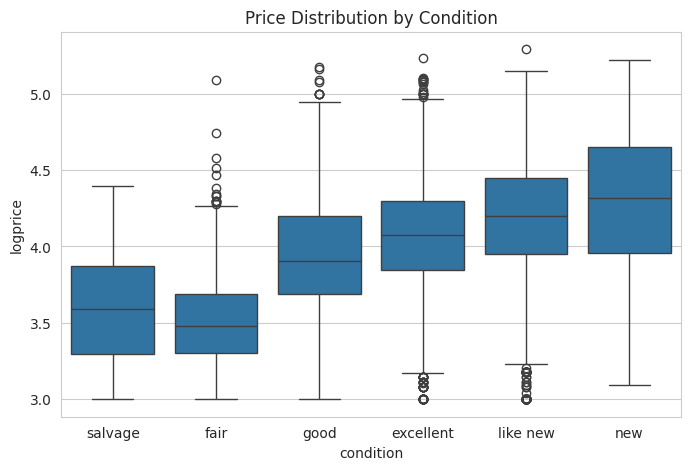

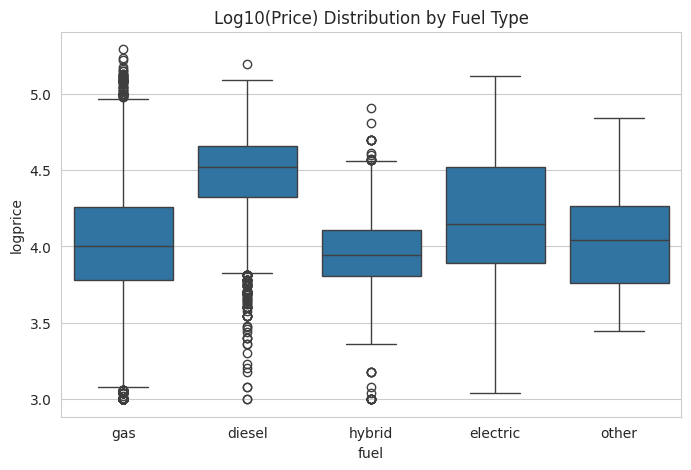

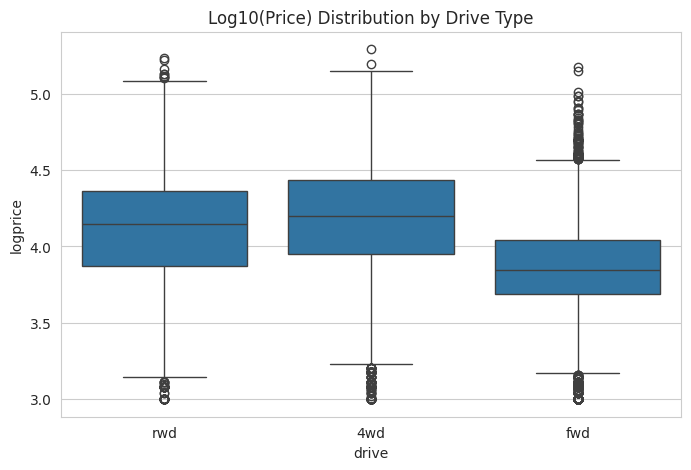

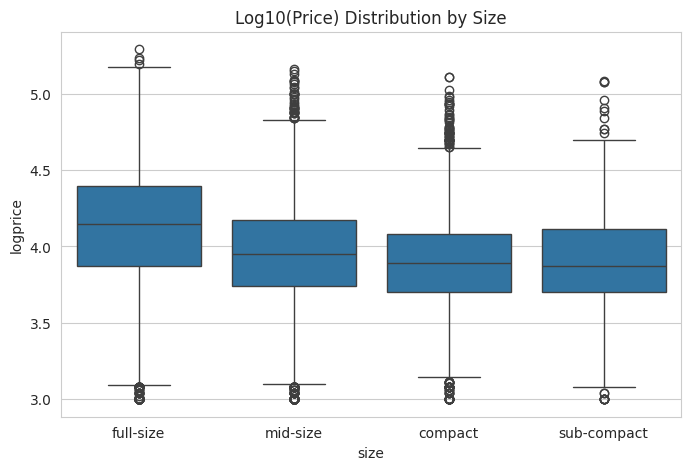

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='condition', y='logprice', data=vehicles, order=['salvage', 'fair', 'good','excellent','like new', 'new'])
plt.title("Price Distribution by Condition")
plt.show()
# Takeaway: Relationship of Car's Condition to Log Price fits intuition: the better the condition, the higher the median of the Log10(Price)

plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='logprice', data=vehicles)
plt.title("Log10(Price) Distribution by Fuel Type")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x='drive', y='logprice', data=vehicles)
plt.title("Log10(Price) Distribution by Drive Type")
plt.show()



plt.figure(figsize=(8, 5))
sns.boxplot(x='size', y='logprice', data=vehicles)
plt.title("Log10(Price) Distribution by Size")
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge


# Based on takeaways from Data Exploration, consider the following columns as inputs, and create a new dataframe
vehicle_inputs = vehicles[['year', 'odometer', 'condition', 'size', 'drive']]

# Use the log10(price) as the target since we saw that this makes the relationships to other variables more or less linear
target = vehicles['logprice']


# Split vehicle inputs into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(vehicle_inputs, target, test_size=0.2, random_state=42)


In [ ]:
# Separate numerical and categorical features since different transformations will apply to them
numerical_cols = ['year', 'odometer']
categorical_cols = ['condition', 'size', 'drive']

# Setup numerical transformer to perform standard scaling and polynomial features for numeric inputs
num_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Polynomial features
])
# Setup categorical transformer to perform One Hot Encoding for categorical inputs
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Column Transformer: Apply transformations
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])

# Define Ridge regression pipeline
ridge_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('ridge', Ridge())
])

# Define hyperparameter grid for Ridge regression
param_grid = {'ridge__alpha': np.logspace(-3, 3, 10)}  # Search over alpha values


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameter
print("Best alpha:", grid_search.best_params_['ridge__alpha'])

# Evaluate on test set
test_score = grid_search.score(X_test, y_test)
print("Test set MSE:", -test_score)


Best alpha: 0.1
Test set MSE: 0.0448523720206225


In [ ]:

# Retrieve the best estimator from GridSearchCV
best_pipeline = grid_search.best_estimator_

# Retrieve the preprocessor and Ridge model from the pipeline
preprocessor = best_pipeline.named_steps['preprocessing']
ridge_model = best_pipeline.named_steps['ridge']

# --- Extract the feature names selected by Ridge and Grid Search ---

#  Numeric feature names
num_pipeline = preprocessor.named_transformers_['num']
# Extract the PolynomialFeatures transformer
poly_transformer = num_pipeline.named_steps['poly']

num_feature_names = poly_transformer.get_feature_names_out(numerical_cols)

# Categorical feature names
cat_encoder = preprocessor.named_transformers_['cat']
# Get the one-hot encoded feature names.
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)

# Combine all feature names into one array.
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Obtain coefficients for chosen features

print("\nFinal Model Details:")
print("---------------------")
print("Best alpha (regularization strength):", grid_search.best_params_['ridge__alpha'])
print("Best CV score (negative MSE):", grid_search.best_score_)
print("Test set MSE:", -grid_search.score(X_test, y_test))
print("\nIntercept:", ridge_model.intercept_)

print("\nCoefficients:")
for feature, coef in zip(all_feature_names, ridge_model.coef_):
    print(f"  {feature}: {coef}")





Final Model Details:
---------------------
Best alpha (regularization strength): 0.1
Best CV score (negative MSE): -0.043529346739052566
Test set MSE: 0.0448523720206225

Intercept: 3.8932900430691664

Coefficients:
  year: 0.1791695335800416
  odometer: -0.0752801951553068
  year^2: 0.02861026193091628
  year odometer: 0.025495166359333323
  odometer^2: 0.0052798330782782045
  condition_excellent: 0.12227906700198074
  condition_fair: -0.185428593050058
  condition_good: 0.07335395575277127
  condition_like new: 0.10637852027821428
  condition_new: 0.1211236678658358
  condition_salvage: -0.2377066185014872
  size_compact: -0.03361973333173847
  size_full-size: 0.08539575403491363
  size_mid-size: -0.015450833161994009
  size_sub-compact: -0.036325187582753236
  drive_4wd: 0.09272926686387602
  drive_fwd: -0.16947726366190852
  drive_rwd: 0.07674799677635033

Best Estimator Pipeline:
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
          

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.